In [ ]:
import pandas as pd
df=pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [ ]:
print(df.head)
print(df.dtypes)
print('\nSummary Statistics of customer churn Dataset')
print(df.describe())
print('Info of customer churn dataset')
print(df.info())
print('\n missing values')
print(df.isnull().sum())


<bound method NDFrame.head of       SeniorCitizen  tenure  MonthlyCharges  customerID_0003-MKNFE  \
0                 0       1           29.85                  False   
1                 0      34           56.95                  False   
2                 0       2           53.85                  False   
3                 0      45           42.30                  False   
4                 0       2           70.70                  False   
...             ...     ...             ...                    ...   
7038              0      24           84.80                  False   
7039              0      72          103.20                  False   
7040              0      11           29.60                  False   
7041              1       4           74.40                  False   
7042              0      66          105.65                  False   

      customerID_0004-TLHLJ  customerID_0011-IGKFF  customerID_0013-EXCHZ  \
0                     False                  False  

In [ ]:
df = pd.get_dummies(df, drop_first=True)
X = df[['tenure', 'MonthlyCharges', 'Contract_Two year', 'InternetService_Fiber optic', 'PaymentMethod_Electronic check']]
Y = df['Churn_Yes']


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,Y, test_size=0.2 , random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [ ]:
print("Accuracy:", model.score(X_train, Y_train))
print("Test Accuracy:", model.score(X_test, Y_test))

Accuracy: 0.7949946751863685
Test Accuracy: 0.7906316536550745


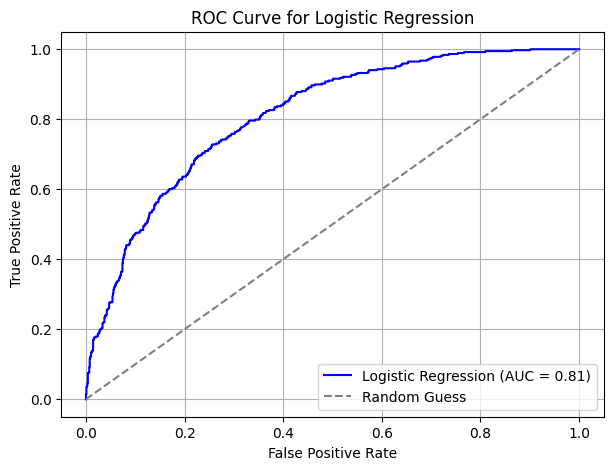

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

Y_prob = model.predict_proba(X_test)[:, 1]


fpr, tpr, thresholds = roc_curve(Y_test, Y_prob)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, color='blue', label='Logistic Regression (AUC = %.2f)' % roc_auc_score(Y_test, Y_prob))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')

plt.title('ROC Curve for Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()
